In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('shopping_trends_updated.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
#Prepare data by converting each objective variable in the dataset to Boolean Type

In [ ]:
#This allows categorical data be able to undergo Linear Regression

In [18]:
#Preparation of Data Frames
X = data[["Age", "Gender", "Category", "Location", "Size", "Color","Season","Subscription Status","Discount Applied","Frequency of Purchases"]]
Y = data["Review Rating"]

Z = data[["Age", "Gender", "Category", "Location", "Size", "Color","Season","Subscription Status","Discount Applied","Frequency of Purchases"]]
#Creating Dummy Variables for Categorical Variables 
X = pd.get_dummies(data=X, drop_first=False)
Z = pd.get_dummies(data=Z, drop_first=False)


index_list = data['Customer ID'].tolist()
column_values = pd.Series(index_list)
Z.insert(loc=0, column='Customer ID', value=column_values)


ColumnList =(X.columns.values.tolist())

In [19]:
X.head()

,Age,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Location_Alabama,Location_Alaska,Location_Arizona,...,Subscription Status_Yes,Discount Applied_No,Discount Applied_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,False,True,False,True,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,19,False,True,False,True,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,50,False,True,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,21,False,True,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
4,45,False,True,False,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False


In [20]:
Z.head()

,Customer ID,Age,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Location_Alabama,Location_Alaska,...,Subscription Status_Yes,Discount Applied_No,Discount Applied_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,False,True,False,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
1,2,19,False,True,False,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,3,50,False,True,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,4,21,False,True,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
4,5,45,False,True,False,True,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False


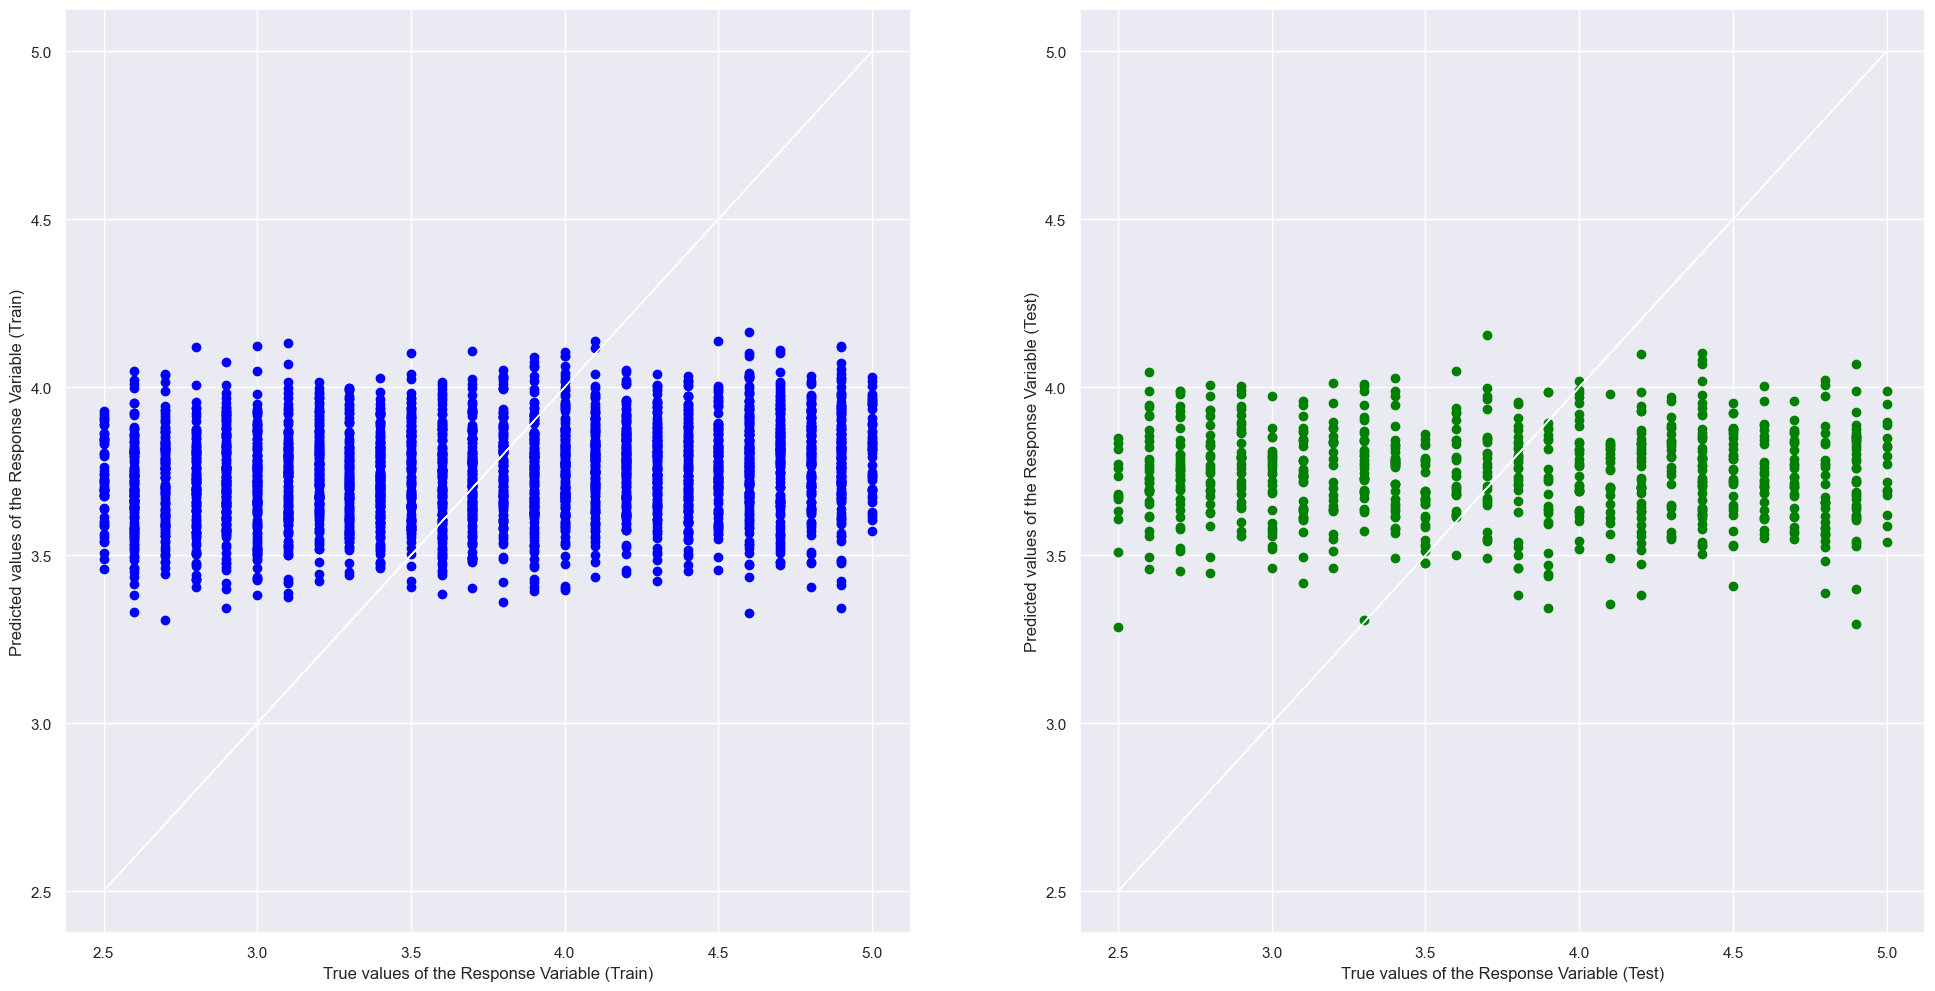

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


#Linear Regression using Train Data
model = LinearRegression() #Create the Linear Regression Object
model.fit(X_train,y_train) #Train the Linear Regression Model



# Predict IMDb values from Predictors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [22]:
# print the intercept
print(model.intercept_)

#Base Score??

-158308588086.98273


In [23]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03834162762156501
Mean Squared Error (MSE) 	: 0.4878479606225394

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.042040551836893814
Mean Squared Error (MSE) 	: 0.5573333680982678



In [24]:
#Prediction of review rate for a few customers

In [31]:
# List of Customer IDs you are interested in
customer_ids = [30, 45, 60]

# Extract rows where 'Customer ID' is in customer_ids list
data_pred = Z[Z["Customer ID"].isin(customer_ids)]

# Display the extracted DataFrame
data_pred

,Customer ID,Age,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Location_Alabama,Location_Alaska,...,Subscription Status_Yes,Discount Applied_No,Discount Applied_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
29,30,31,False,True,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
44,45,39,False,True,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
59,60,63,False,True,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [ ]:
#result of prediction

In [33]:
X_pred = pd.DataFrame(data_pred[ColumnList])



predictions = model.predict(X_pred)
predictions

array([3.82888794, 3.80462646, 3.95901489])

In [36]:

data_pred['Review Rating'] = data['Review Rating'].loc[data_pred.index]

# add the predictions and summarize
predictions = pd.DataFrame(predictions, columns=["Pred_Review Rating"], index=data_pred.index)
data_acc = pd.concat([data_pred[["Customer ID", "Review Rating"]], predictions], axis=1)

print(data_acc)

    Customer ID  Review Rating  Pred_Review Rating
29           30            4.1            3.828888
44           45            4.6            3.804626
59           60            4.6            3.959015


C:\Users\user\AppData\Local\Temp\ipykernel_43000\4121033610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['Review Rating'] = data['Review Rating'].loc[data_pred.index]


In [38]:
data_acc

,Customer ID,Review Rating,Pred_Review Rating
29,30,4.1,3.828888
44,45,4.6,3.804626
59,60,4.6,3.959015


In [ ]:
#The percentage error of prediction error to real review rate

In [39]:
# Assuming 'Review Rating' and 'Pred_Review Rating' are in data_acc
# Calculate the percentage errors
review_rating_errors = 100 * abs(data_acc["Review Rating"] - data_acc["Pred_Review Rating"]) / data_acc["Review Rating"]
review_rating_errors = pd.DataFrame(review_rating_errors, columns=["Error"], index=data_acc.index)

# Concatenate the error dataframe with the main dataframe
data_acc = pd.concat([data_acc, review_rating_errors], axis=1)

# Display the final DataFrame with the errors
print(data_acc)

    Customer ID  Review Rating  Pred_Review Rating      Error
29           30            4.1            3.828888   6.612489
44           45            4.6            3.804626  17.290729
59           60            4.6            3.959015  13.934459
